<a href="https://colab.research.google.com/github/cacbondioxit/xG-Differential-Project/blob/main/Goals_and_xG_autocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# 데이터 불러오기

import pandas as pd

epl = []
big_5 = []

for i in range(2017, 2022):
    df = pd.read_csv(f'/content/drive/MyDrive/xG Differential Project/Premier League Shooting Data/{i}-{i+1}.csv')
    epl.append(df)
    df = pd.read_csv(f'/content/drive/MyDrive/xG Differential Project/Big 5 European Leagues Shooting Data/{i}-{i+1}.csv')
    big_5.append(df)

In [29]:
epl[0]

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,-9999
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,26,1990,24.3,5,33.0,...,4.0,0,0,3.1,3.1,0.09,1.9,1.9,Matches,5f09991f
1,2,Rolando Aarons,eng ENG,MFFW,Newcastle Utd,21,1995,1.5,0,2.0,...,0.0,0,0,0.1,0.1,0.03,-0.1,-0.1,Matches,c5942695
2,3,Tammy Abraham,eng ENG,FW,Swansea City,19,1997,19.2,5,42.0,...,0.0,0,0,6.8,6.8,0.16,-1.8,-1.8,Matches,f586779e
3,4,Charlie Adam,sct SCO,MF,Stoke City,31,1985,4.6,0,9.0,...,3.0,0,1,1.6,0.9,0.09,-1.6,-0.9,Matches,aff418dc
4,5,Adrián,es ESP,GK,West Ham,30,1987,19.0,0,0.0,...,0.0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,f76e6b4e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,525,Wilfried Zaha,ci CIV,FWMF,Crystal Palace,24,1992,28.3,9,64.0,...,0.0,0,0,9.2,9.2,0.14,-0.2,-0.2,Matches,b2bc3b1f
525,526,Davide Zappacosta,it ITA,DFMF,Chelsea,25,1992,12.2,1,25.0,...,0.0,0,0,1.4,1.4,0.06,-0.4,-0.4,Matches,7fe90ccd
526,527,Marvin Zeegelaar,nl NED,DF,Watford,26,1990,11.0,0,0.0,...,0.0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,8abd0c03
527,528,Oleksandr Zinchenko,ua UKR,DF,Manchester City,20,1996,5.9,0,5.0,...,0.0,0,0,0.1,0.1,0.02,-0.1,-0.1,Matches,51cf8561


In [30]:
# 데이터프레임을 열이 커지는 방향으로 모두 합침

df_concat_epl = pd.concat(epl)

df_concat_epl

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,-9999
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,26,1990,24.3,5,33.0,...,4.0,0,0,3.1,3.1,0.09,1.9,1.9,Matches,5f09991f
1,2,Rolando Aarons,eng ENG,MFFW,Newcastle Utd,21,1995,1.5,0,2.0,...,0.0,0,0,0.1,0.1,0.03,-0.1,-0.1,Matches,c5942695
2,3,Tammy Abraham,eng ENG,FW,Swansea City,19,1997,19.2,5,42.0,...,0.0,0,0,6.8,6.8,0.16,-1.8,-1.8,Matches,f586779e
3,4,Charlie Adam,sct SCO,MF,Stoke City,31,1985,4.6,0,9.0,...,3.0,0,1,1.6,0.9,0.09,-1.6,-0.9,Matches,aff418dc
4,5,Adrián,es ESP,GK,West Ham,30,1987,19.0,0,0.0,...,0.0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,f76e6b4e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,Christoph Zimmermann,de GER,DF,Norwich City,28,1993,1.7,0,2.0,...,0.0,0,0,0.1,0.1,0.04,-0.1,-0.1,Matches,2d5f03bf
542,543,Oleksandr Zinchenko,ua UKR,DF,Manchester City,24,1996,11.6,0,12.0,...,0.0,0,0,0.6,0.6,0.05,-0.6,-0.6,Matches,51cf8561
543,544,Hakim Ziyech,ma MAR,MFFW,Chelsea,28,1993,14.7,4,52.0,...,3.0,0,0,4.1,4.1,0.08,-0.1,-0.1,Matches,6622454d
544,545,Kurt Zouma,fr FRA,DF,West Ham,26,1994,23.1,1,6.0,...,0.0,0,0,0.9,0.9,0.15,0.1,0.1,Matches,ce4246f5


In [31]:
df_concat_big_5 = pd.concat(big_5)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'The Distribution of the number of shooting(Big 5 European Leagues)')]

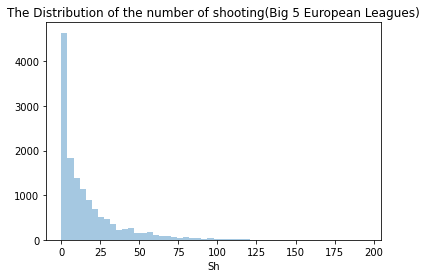

In [32]:
import seaborn as sns

# 선수들의 슈팅 수의 분포를 확인. 5대 리그를 통틀어 단 한 번도 슈팅을 못한 선수들이 가장 많다.
sns.distplot(df_concat_big_5["Sh"], kde=False).set(title='The Distribution of the number of shooting(Big 5 European Leagues)')

[Text(0.5, 1.0, 'The Distribution of the number of shooting(EPL)')]

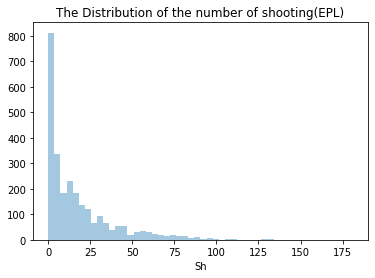

In [33]:
sns.distplot(df_concat_epl["Sh"], kde=False).set(title='The Distribution of the number of shooting(EPL)')

In [34]:
# 참고로 제목에 한글을 넣으면 깨진다...

In [35]:
# 선수들의 슈팅 수가 10회 이상인 데이터가 몇 %인지 확인하자. 대략 전체의 절반 정도 됨을 알 수 있다.

df_Sh_10 = df_concat_big_5[df_concat_big_5["Sh"] >= 10]

len(df_Sh_10) / len(df_concat_big_5)

0.47945304586890464

[Text(0.5, 1.0, 'The Distribution of the (Goals - xG) (Big 5 European Leagues)')]

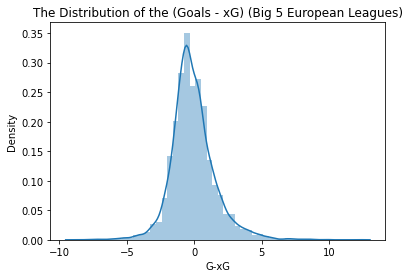

In [36]:
# 5대 리그에서 (실제 득점 - 기대 득점) 값의 분포를 확인. 0을 중심으로 종 모양(밑에 정규성검정 해놨음. 정규분포 아님)으로 퍼져있는 것을 알 수 있다.

sns.distplot(df_Sh_10['G-xG']).set(title='The Distribution of the (Goals - xG) (Big 5 European Leagues)')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'The Distribution of the (Goals - xG) (EPL)')]

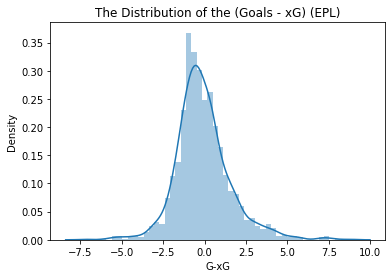

In [37]:
sns.distplot(df_concat_epl[df_concat_epl["Sh"] >= 10]['G-xG']).set(title='The Distribution of the (Goals - xG) (EPL)')

In [38]:
# G-xG 값의 autocorrelation을 측정하기 위한 작업 시작
# 선수들 데이터프레임을 "이름"에 따라 각각 join하여 리스트에 저장

epl_join_list = []
big_5_join_list = []

for i in range(len(epl)-1):
    joined_df = epl[i].merge(epl[i+1], left_on='Player', right_on='Player', how='inner')
    epl_join_list.append(joined_df)

    joined_df = big_5[i].merge(big_5[i+1], left_on='Player', right_on='Player', how='inner')
    big_5_join_list.append(joined_df)

df_join_epl = pd.concat(epl_join_list)
df_join_epl = df_join_epl[(df_join_epl['Sh_x'] >= 10) & (df_join_epl['Sh_y'] >= 10)]

df_join_big_5 = pd.concat(big_5_join_list)
df_join_big_5 = df_join_big_5[(df_join_big_5['Sh_x'] >= 10) & (df_join_big_5['Sh_y'] >= 10)]

df_join_epl

,Rk_x,Player,Nation_x,Pos_x,Squad_x,Age_x,Born_x,90s_x,Gls_x,Sh_x,...,FK_y,PK_y,PKatt_y,xG_y,npxG_y,npxG/Sh_y,G-xG_y,np:G-xG_y,Matches_y,-9999_y
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,26,1990,24.3,5,33.0,...,0.0,0,0,2.6,2.6,0.06,0.4,0.4,Matches,5f09991f
1,8,Sergio Agüero,ar ARG,FW,Manchester City,29,1988,21.8,21,90.0,...,3.0,2,2,18.1,16.5,0.14,2.9,2.5,Matches,4d034881
2,9,Nathan Aké,nl NED,DF,Bournemouth,22,1995,37.3,2,18.0,...,0.0,0,0,3.4,3.4,0.13,0.6,0.6,Matches,eaeca114
3,10,Marc Albrighton,eng ENG,MFFW,Leicester City,27,1989,28.2,2,20.0,...,0.0,0,0,1.2,1.2,0.06,0.8,0.8,Matches,b827d5b3
4,11,Toby Alderweireld,be BEL,DF,Tottenham,28,1989,13.1,0,10.0,...,0.0,0,0,1.1,1.1,0.06,-1.1,-1.1,Matches,f7d50789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,522,Granit Xhaka,ch SUI,MFDF,Arsenal,27,1992,28.0,1,21.0,...,1.0,0,0,1.7,1.7,0.06,-0.7,-0.7,Matches,e61b8aee
359,526,Wilfried Zaha,ci CIV,FW,Crystal Palace,27,1992,29.0,11,58.0,...,0.0,5,7,11.0,5.4,0.09,3.0,3.6,Matches,b2bc3b1f
360,529,Oleksandr Zinchenko,ua UKR,DF,Manchester City,23,1996,16.4,0,16.0,...,0.0,0,0,0.6,0.6,0.05,-0.6,-0.6,Matches,51cf8561
361,530,Hakim Ziyech,ma MAR,MFFW,Chelsea,27,1993,13.0,2,35.0,...,3.0,0,0,4.1,4.1,0.08,-0.1,-0.1,Matches,6622454d


In [39]:
df_join_big_5

,Rk_x,Player,Nation_x,Pos_x,Squad_x,Comp_x,Age_x,Born_x,90s_x,Gls_x,...,FK_y,PK_y,PKatt_y,xG_y,npxG_y,npxG/Sh_y,G-xG_y,np:G-xG_y,Matches_y,-9999_y
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,26.0,1990.0,24.3,5,...,0.0,0,0,2.6,2.6,0.06,0.4,0.4,Matches,5f09991f
2,7,Mehdi Abeid,dz ALG,MF,Dijon,fr Ligue 1,24.0,1992.0,13.1,0,...,0.0,1,1,2.9,2.1,0.06,0.1,-0.1,Matches,a4c3f7af
5,11,Francesco Acerbi,it ITA,DF,Sassuolo,it Serie A,29.0,1988.0,38.0,0,...,0.0,0,0,3.4,3.4,0.20,-0.4,-0.4,Matches,b96b595c
13,22,Aritz Aduriz,es ESP,FW,Athletic Club,es La Liga,36.0,1981.0,23.9,9,...,0.0,2,2,3.3,1.8,0.10,-1.3,-1.8,Matches,293211e1
15,27,Sergio Agüero,ar ARG,FW,Manchester City,eng Premier League,29.0,1988.0,21.8,21,...,3.0,2,2,18.1,16.5,0.14,2.9,2.5,Matches,4d034881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2809,Piotr Zieliński,pl POL,MF,Napoli,it Serie A,26.0,1994.0,28.0,8,...,1.0,0,0,4.0,4.0,0.09,2.0,2.0,Matches,a5296e55
2142,2810,Oleksandr Zinchenko,ua UKR,DF,Manchester City,eng Premier League,23.0,1996.0,16.4,0,...,0.0,0,0,0.6,0.6,0.05,-0.6,-0.6,Matches,51cf8561
2143,2813,Hakim Ziyech,ma MAR,MFFW,Chelsea,eng Premier League,27.0,1993.0,13.0,2,...,3.0,0,0,4.1,4.1,0.08,-0.1,-0.1,Matches,6622454d
2148,2820,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,21.0,1998.0,9.6,1,...,12.0,0,0,5.2,5.2,0.10,1.8,1.8,Matches,79300479


In [40]:
df_join_epl.columns

Index(['Rk_x', 'Player', 'Nation_x', 'Pos_x', 'Squad_x', 'Age_x', 'Born_x',
       '90s_x', 'Gls_x', 'Sh_x', 'SoT_x', 'SoT%_x', 'Sh/90_x', 'SoT/90_x',
       'G/Sh_x', 'G/SoT_x', 'Dist_x', 'FK_x', 'PK_x', 'PKatt_x', 'xG_x',
       'npxG_x', 'npxG/Sh_x', 'G-xG_x', 'np:G-xG_x', 'Matches_x', '-9999_x',
       'Rk_y', 'Nation_y', 'Pos_y', 'Squad_y', 'Age_y', 'Born_y', '90s_y',
       'Gls_y', 'Sh_y', 'SoT_y', 'SoT%_y', 'Sh/90_y', 'SoT/90_y', 'G/Sh_y',
       'G/SoT_y', 'Dist_y', 'FK_y', 'PK_y', 'PKatt_y', 'xG_y', 'npxG_y',
       'npxG/Sh_y', 'G-xG_y', 'np:G-xG_y', 'Matches_y', '-9999_y'],
      dtype='object')

In [41]:
# 이전 시즌과 다음 시즌의 xG 값만을 추출

df_epl_xg = df_join_epl[['xG_x', 'xG_y']].reset_index(drop=True)

df_epl_xg

,xG_x,xG_y
0,3.1,2.6
1,16.2,18.1
2,1.4,3.4
3,1.6,1.2
4,0.4,1.1
...,...,...
670,0.9,1.7
671,8.1,11.0
672,0.7,0.6
673,1.9,4.1


In [42]:
df_big_5_xg = df_join_big_5[['xG_x', 'xG_y']].reset_index(drop=True)

df_big_5_xg

,xG_x,xG_y
0,3.1,2.6
1,1.0,2.9
2,1.0,3.4
3,11.1,3.3
4,16.2,18.1
...,...,...
3561,5.3,4.0
3562,0.7,0.6
3563,1.9,4.1
3564,0.7,5.2


In [43]:
# epl 한정 자기상관계수 측정. 0.750로 꽤 높은 편이다.

df_epl_xg.corr(method ='pearson')

,xG_x,xG_y
xG_x,1.000000,0.750104
xG_y,0.750104,1.000000


In [44]:
# 5대 리그로 확대하여 상관계수 측정. 0.731로 꽤 높은 편이다.

df_big_5_xg.corr(method ='pearson')

,xG_x,xG_y
xG_x,1.000000,0.730609
xG_y,0.730609,1.000000


Text(0, 0.5, 'xG at season (t+1)')

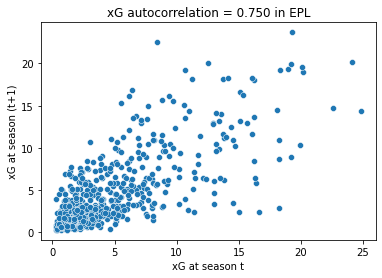

In [57]:
# 시각화
import matplotlib.pyplot as plt

sns.scatterplot(data=df_epl_xg, x="xG_x", y="xG_y")
plt.title("xG autocorrelation = 0.750 in EPL")
plt.xlabel("xG at season t")
plt.ylabel("xG at season (t+1)")

Text(0, 0.5, 'xG at season (t+1)')

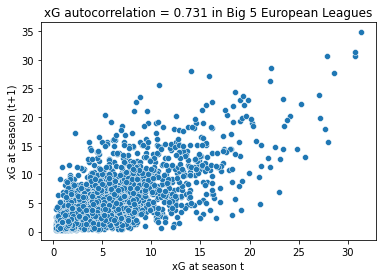

In [58]:
sns.scatterplot(data=df_big_5_xg, x="xG_x", y="xG_y")
plt.title("xG autocorrelation = 0.731 in Big 5 European Leagues")
plt.xlabel("xG at season t")
plt.ylabel("xG at season (t+1)")

In [47]:
# 이전 시즌과 다음 시즌의 득점 값만을 추출

df_epl_goals = df_join_epl[['Gls_x', 'Gls_y']].reset_index(drop=True)

df_epl_goals

,Gls_x,Gls_y
0,5,3
1,21,21
2,2,4
3,2,2
4,0,0
...,...,...
670,1,1
671,11,14
672,0,0
673,2,4


In [48]:
df_big_5_goals = df_join_big_5[['Gls_x', 'Gls_y']].reset_index(drop=True)

df_big_5_goals

,Gls_x,Gls_y
0,5,3
1,0,3
2,0,3
3,9,2
4,21,21
...,...,...
3561,8,6
3562,0,0
3563,2,4
3564,1,7


In [49]:
# epl 한정 자기상관계수 측정. 0.696으로 꽤 높은 값이다.

df_epl_goals.corr(method ='pearson')

,Gls_x,Gls_y
Gls_x,1.000000,0.696298
Gls_y,0.696298,1.000000


In [50]:
# 5대 리그로 확대하여 상관계수 측정. 더 큰 표본에서는 0.644으로 꽤 높은 값이다.

df_big_5_goals.corr(method ='pearson')

,Gls_x,Gls_y
Gls_x,1.000000,0.644465
Gls_y,0.644465,1.000000


Text(0, 0.5, 'Goals at season (t+1)')

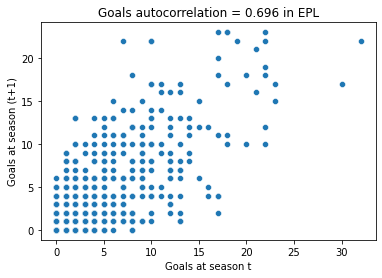

In [51]:
# 시각화
import matplotlib.pyplot as plt

sns.scatterplot(data=df_epl_goals, x="Gls_x", y="Gls_y")
plt.title("Goals autocorrelation = 0.696 in EPL")
plt.xlabel("Goals at season t")
plt.ylabel("Goals at season (t+1)")

Text(0, 0.5, 'Goals at season (t+1)')

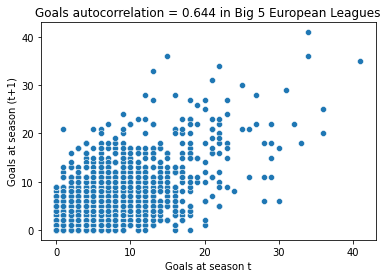

In [52]:
sns.scatterplot(data=df_big_5_goals, x="Gls_x", y="Gls_y")
plt.title("Goals autocorrelation = 0.644 in Big 5 European Leagues")
plt.xlabel("Goals at season t")
plt.ylabel("Goals at season (t+1)")